# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

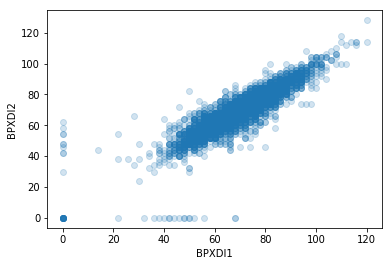

In [2]:
sns.regplot(x="BPXDI1", y="BPXDI2", data=da, fit_reg=False, scatter_kws={"alpha":0.2})

In [3]:
print(da.loc[:,["BPXSY1","BPXSY2"]].dropna().corr())
print("")
print(da.loc[:,["BPXDI1","BPXDI2"]].dropna().corr())

          BPXSY1    BPXSY2
BPXSY1  1.000000  0.962287
BPXSY2  0.962287  1.000000

          BPXDI1    BPXDI2
BPXDI1  1.000000  0.884722
BPXDI2  0.884722  1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

Correlation between the first two systolics are near to be perfect. Correlation = 1. Instead correlation between the first two 
dyastolics are least correlated each other

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

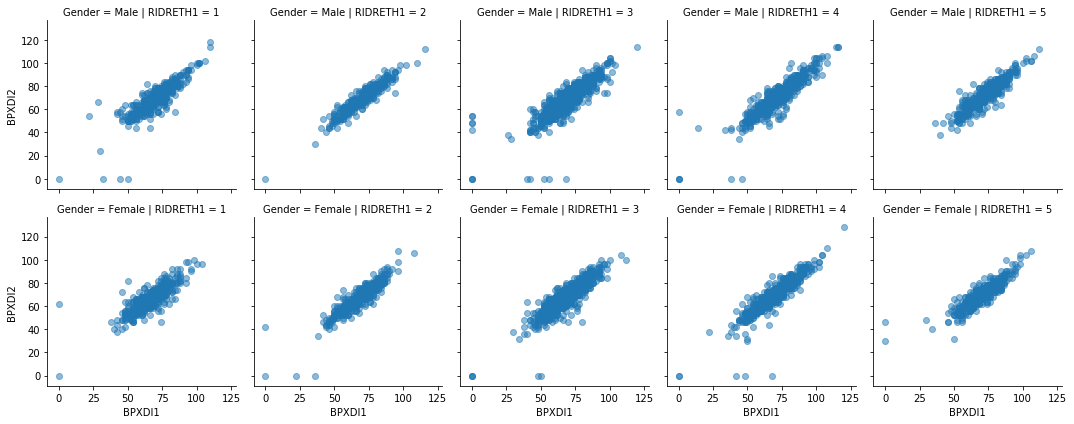

In [4]:
da["Gender"] = da.RIAGENDR.replace({1:"Male", 2:"Female"})
Q2 = sns.FacetGrid(da, col="RIDRETH1", row="Gender").map(plt.scatter, "BPXDI1","BPXDI2", alpha=0.5)

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

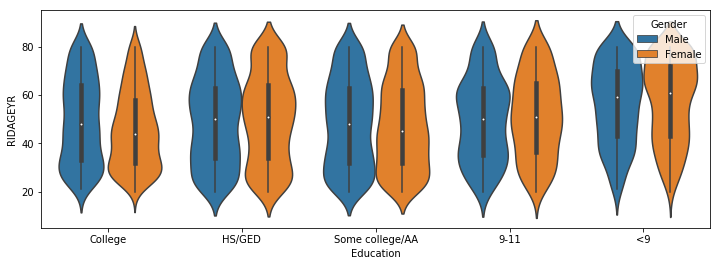

In [5]:
da["Education"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da = da.loc[da.Education != "Don't know"]
plt.figure(figsize=(12,4))
a = sns.violinplot(da.Education, da.RIDAGEYR, da.Gender)

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

In [6]:
da.RIDAGEYR.describe()

count    5732.000000
mean       48.036985
std        18.423450
min        18.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

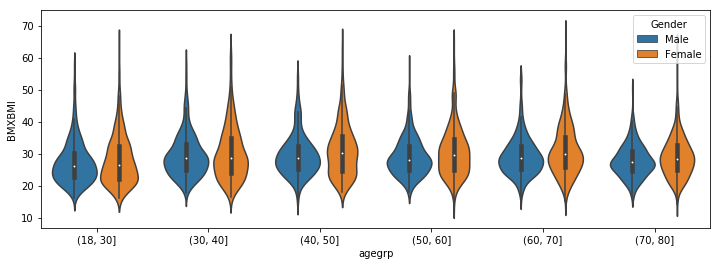

In [7]:
da["agegrp"] = pd.cut(da.RIDAGEYR,[18,30,40,50,60,70,80])
plt.figure(figsize=(12,4))
b = sns.violinplot(x=da.agegrp, y=da.BMXBMI, hue=da.Gender)

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [8]:
da.RIDRETH1.describe()

count    5732.000000
mean        3.042742
std         1.296717
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: RIDRETH1, dtype: float64

In [9]:
da["Insurance"] = da.HIQ210.replace({1.0:"Yes", 2.0:"No", 9.0:"Don't know"})
da["Ethnicity"] = da.RIDRETH1.replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White", 
                                      4: "Non-Hispanic Black", 5: "Other Race - Including Multi-Racial"})
da = da.loc[da.Insurance != "Don't know",:]
freq_tab = pd.crosstab(da.Ethnicity, da.Insurance).apply(lambda x: x/x.sum(), axis=1)
freq_tab

Insurance,No,Yes
Ethnicity,,
Mexican American,0.861194,0.138806
Non-Hispanic Black,0.891137,0.108863
Non-Hispanic White,0.932564,0.067436
Other Hispanic,0.871080,0.128920
Other Race - Including Multi-Racial,0.918033,0.081967
